In [144]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

In [145]:
datafram=pd.read_csv("Iris.csv",index_col=0)

In [146]:
datafram

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [147]:
datafram_map={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}

In [148]:
datafram['Species']=datafram['Species'].map(datafram_map)

In [149]:
datafram

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0
9,4.4,2.9,1.4,0.2,0


In [150]:
array=datafram.values
X=array[:,0:4]
y=array[:,4]

In [151]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [152]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [153]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [155]:
print(scores.mean())

0.966666666667


In [156]:
k_range=range(1,31)

In [157]:
k_scores=[]

In [158]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Accuracy')

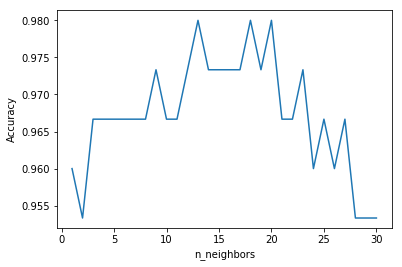

In [160]:
plt.plot(k_range,k_scores)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")

# Cross-Validation example
### our goal is to compare our knn regrassion with logistic regrassion

In [161]:
knn=KNeighborsClassifier(n_neighbors=20)

In [162]:
my_scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(my_scores.mean())

0.98


In [163]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
my_scores2=cross_val_score(LR,X,y,cv=10,scoring='accuracy')
print(my_scores2.mean())

0.953333333333


# Cross Validation Score: feature selection
## Goal: wether Newspaper feature should be include on linear Regrassion Model from sales Dataset

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
datafram=pd.read_csv("Advertising.csv",index_col=0)

In [166]:
array=datafram.values

In [167]:
X=array[:,0:3]
y=array[:,3]

In [168]:
X

array([[ 230.1,   37.8,   69.2],
       [  44.5,   39.3,   45.1],
       [  17.2,   45.9,   69.3],
       [ 151.5,   41.3,   58.5],
       [ 180.8,   10.8,   58.4],
       [   8.7,   48.9,   75. ],
       [  57.5,   32.8,   23.5],
       [ 120.2,   19.6,   11.6],
       [   8.6,    2.1,    1. ],
       [ 199.8,    2.6,   21.2],
       [  66.1,    5.8,   24.2],
       [ 214.7,   24. ,    4. ],
       [  23.8,   35.1,   65.9],
       [  97.5,    7.6,    7.2],
       [ 204.1,   32.9,   46. ],
       [ 195.4,   47.7,   52.9],
       [  67.8,   36.6,  114. ],
       [ 281.4,   39.6,   55.8],
       [  69.2,   20.5,   18.3],
       [ 147.3,   23.9,   19.1],
       [ 218.4,   27.7,   53.4],
       [ 237.4,    5.1,   23.5],
       [  13.2,   15.9,   49.6],
       [ 228.3,   16.9,   26.2],
       [  62.3,   12.6,   18.3],
       [ 262.9,    3.5,   19.5],
       [ 142.9,   29.3,   12.6],
       [ 240.1,   16.7,   22.9],
       [ 248.8,   27.1,   22.9],
       [  70.6,   16. ,   40.8],
       [ 2

In [169]:
feature_col=['TV','radio','newspaper']
X=datafram[feature_col]

In [170]:
y=datafram.sales

In [171]:
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2


In [172]:
LR=LinearRegression()
LR_scores=cross_val_score(LR,X,y,cv=10,scoring='mean_squared_error')

C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0

In [173]:
LR_scores

array([-3.56038438, -3.29767522, -2.08943356, -2.82474283, -1.3027754 ,
       -1.74163618, -8.17338214, -2.11409746, -3.04273109, -2.45281793])

In [174]:
pos_LR_scores=-LR_scores

In [175]:
F=np.sqrt(pos_LR_scores)

In [176]:
print(F.mean())

1.69135317081


In [177]:
feature_col=['TV','radio']
X=datafram[feature_col]

In [178]:
print((np.sqrt(-cross_val_score(LR,X,y,cv=10,scoring='mean_squared_error'))).mean())

1.67967484191


C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\DELL\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0

### so amra newspaper feature ta bad dite pari karon amader root_mean_squared_error kom ashtise